## Importing all dependencies

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plot
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Data collection & preprocessing

In [4]:
data = pd.read_csv(r"IRIS.csv")

In [69]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Checking if Dataset contains empty data 


In [70]:
data.isnull().count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

## Describing The Data

In [71]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking DataSet Information

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Counting samples on each species

In [73]:
data['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Creating Histogram Of Sepal width

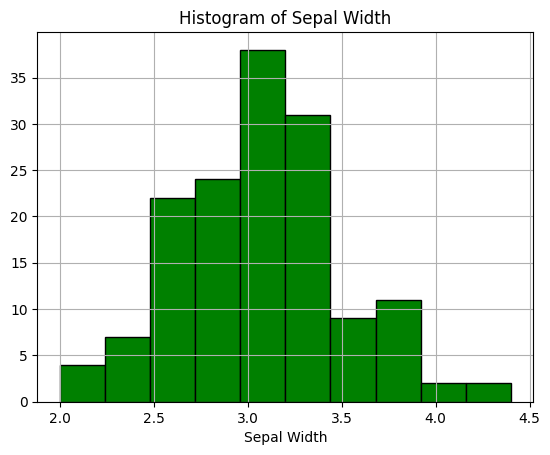

In [6]:
data['sepal_width'].hist(color='green', edgecolor='black')
plot.xlabel('Sepal Width')
plot.title('Histogram of Sepal Width')
plot.show()

## Creating Histogram Of Sepal Length

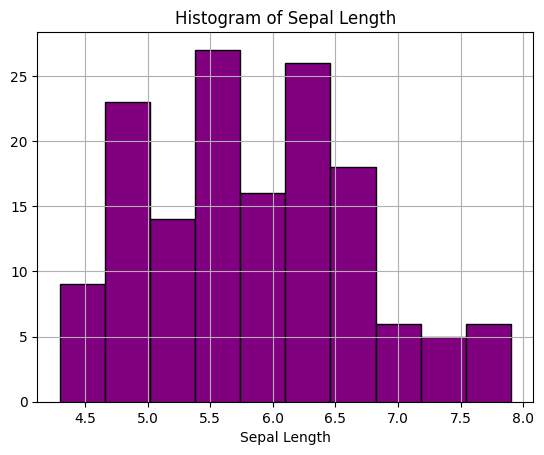

In [7]:
data['sepal_length'].hist(color='purple', edgecolor='black')
plot.xlabel('Sepal Length')
plot.title('Histogram of Sepal Length')
plot.show()

## Creating Histogram Of Petal Width

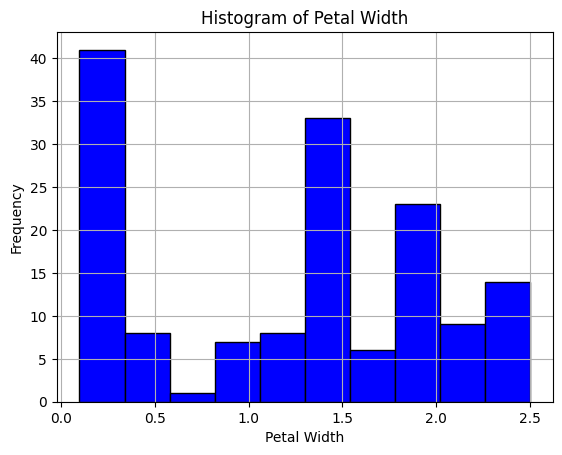

In [8]:
data['petal_width'].hist(color='blue', edgecolor='black')
plot.xlabel('Petal Width')
plot.ylabel('Frequency')
plot.title('Histogram of Petal Width')
plot.show()

## Creating Histogram Of Petal length

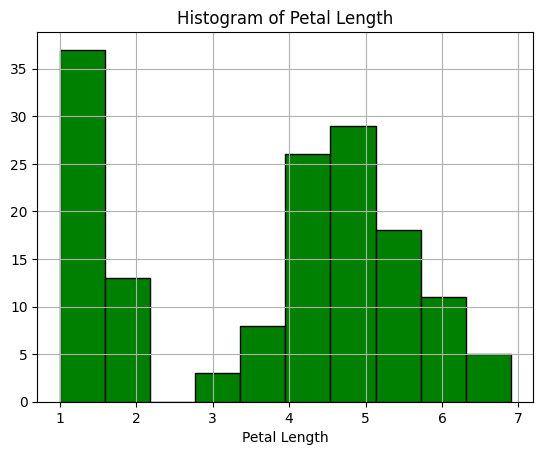

In [9]:
data['petal_length'].hist(color='green', edgecolor='black')

plot.xlabel('Petal Length')
plot.title('Histogram of Petal Length')
plot.show()

## Finding the Unique species 

In [78]:
unique=data['species'].unique()
print(unique)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## assigning colors to different species for bargraph

In [79]:
col = ["blue","green","violet"]
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

## Visualizing the relationship between sepal length and sepal width for different species of flowers.

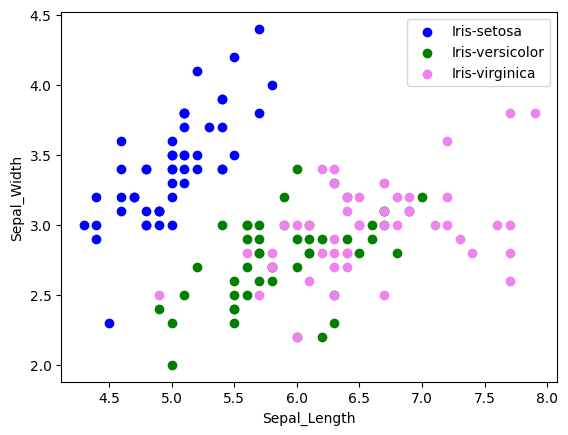

In [80]:
# sepal
for i in range(len(species)):
    x = data[data['species'] == species[i]]
    plot.scatter(x['sepal_length'],x['sepal_width'],c = col[i],label = species[i])
    plot.legend()
    plot.xlabel("Sepal_Length")
    plot.ylabel("Sepal_Width")

## Visualizing  the relationship between petal length and petal width for different species of flowers.

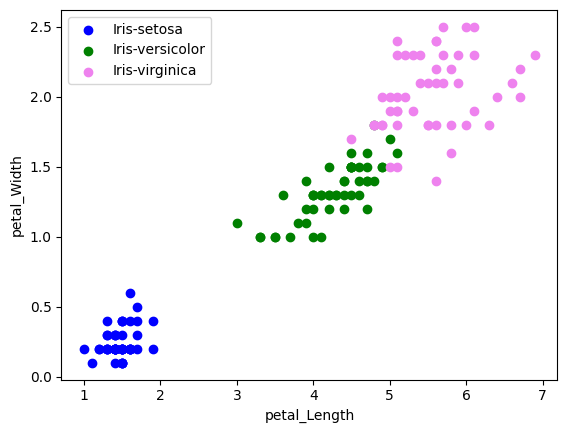

In [81]:
# petal
for i in range(len(species)):
    x = data[data['species'] == species[i]]
    plot.scatter(x['petal_length'],x['petal_width'],c = col[i],label = species[i])
    plot.legend()
    plot.xlabel("petal_Length")
    plot.ylabel("petal_Width")
    

## Converting categorical species labels to numeric using LabelEncoder

In [82]:

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['species'] = l.fit_transform(data['species'])

## Correlation heatmap for data

<Axes: >

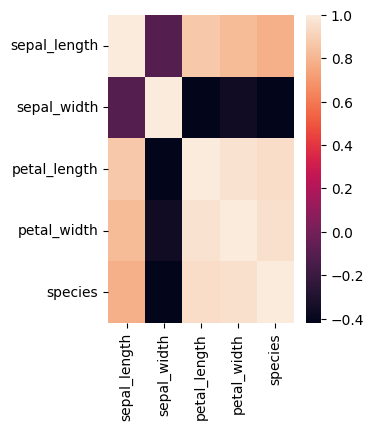

In [83]:
crr = data.corr()
fig, ax = plot.subplots(figsize=(3,4))
sns.heatmap(crr, annot=False, ax=ax)

## Data Splitting: features and target variables

In [89]:
from sklearn.model_selection import train_test_split
X = data.drop(columns   =['species'])
Y = data['species']

## Training data


In [90]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X,Y,test_size =  0.30)

## logistic regretion


In [95]:
model = LogisticRegression()

## Fitting the model with training data

In [96]:
model.fit(X_Train , Y_Train)

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model accuracy on test data

In [98]:
model.score(X_Test , Y_Test)*100

95.55555555555556

## Initilizing classifier model

In [103]:
model = KNeighborsClassifier()

## Training classifier

In [104]:
model.fit(X_Train , Y_Train)    

KNeighborsClassifier()

## Training accuracy of KNeighborsClassifier model

In [106]:
model.score(X_Train, Y_Train)*100

95.23809523809523

## Initilizing  decision tree classifier model

In [108]:
model = DecisionTreeClassifier()

## Fitting data to DecisionTreeClassifier model

In [114]:
model.fit(X_Train , Y_Train)

DecisionTreeClassifier()

## Evaluating test data accuracy with DecisionTreeClassifier model

In [117]:
print("accuracy_percentage : ", model.score(X_Test, Y_Test) * 100)

accuracy_percentage :  91.11111111111111


## Presentation Link
https://tome.app/shubham-ltd-53a/iris-in-the-neighbourhood-a-classification-tale-clltekwto0511pi5s2c3pae5i